## 🧩  Import Required Libraries
In this step, we import all the essential Python libraries needed for data handling, visualization, model training, and evaluation.
- os, sys → to manage file paths and system info
- numpy, pandas → for numerical computations and data manipulation
- matplotlib.pyplot → for visualizing handwritten digits
- scikit-learn (sklearn) → for splitting data, training SVM models, and evaluating performance
- joblib → for saving trained models for later use
- warnings → to suppress unnecessary warnings for a cleaner output

In [26]:
# Imports
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

print('Python:', sys.version.splitlines()[0])
print('Working dir:', os.getcwd())


Python: 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
Working dir: f:\AI_ML Course\Machine Learning Algo\Support_Vector_Machine(SVM)


## 📂 Verify Dataset Files
Before proceeding, it’s important to ensure that the required dataset files are present in the working directory.
- This code checks for the presence of train.csv and test.csv files.
- If train.csv is missing, it raises an error reminding you to download it from Kaggle (Digit Recognizer dataset) and place it in the same directory as your notebook.

In [25]:
# Check files
for f in ['train.csv', 'test.csv']:
    print(f, 'FOUND' if os.path.exists(f) else 'MISSING')

if not os.path.exists('train.csv'):
    raise FileNotFoundError('train.csv not found. Download it from Kaggle and place it here before running.')


train.csv FOUND
test.csv FOUND


## 🧮 Load the Dataset
Now that we’ve verified the dataset files, we can load them into our environment using Pandas.
- train.csv → contains 42,000 labeled images (digits 0–9).
- test.csv → contains 28,000 unlabeled images used for prediction and Kaggle submission.

In [1]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (42000, 785)
Test shape: (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 🔧 Step 4: Separate Features and Labels
Each image in the dataset is represented by 784 pixel values (28×28 image).
The label column indicates which digit (0–9) the image represents.
- X → feature matrix containing pixel values only.
- y → target vector containing digit labels.

In [22]:
# Prepare features & labels
X = train.drop('label', axis=1)
y = train['label']
print('X shape:', X.shape, 'y shape:', y.shape)


X shape: (42000, 784) y shape: (42000,)


## 🎨 Visualize Sample Digits
Before training the model, it’s helpful to visualize a few handwritten digits from the dataset to understand how the data looks.
- The loop displays the first 10 images from the training data.
- Each image is reshaped from a 1D array of 784 pixels to a 28×28 grid.
- The grayscale (cmap='gray') color map is used for clarity.
- Each subplot title shows the true label of the corresponding digit.

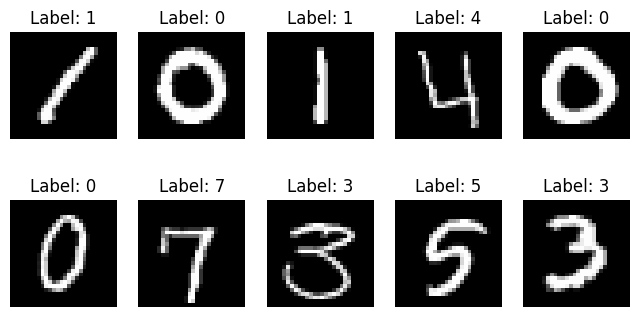

In [27]:


plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y.iloc[i]}")
    plt.axis('off')
plt.show()


## 🔢 Normalize Data
Each pixel in your digit image has a value between 0 and 255.
* 0 → black (no intensity)
* 255 → white (full intensity)

When we divide by 255.0, we scale all pixel values to a range between 0 and 1.

In [23]:
# Normalize
X_scaled = X / 255.0
print('Min/max of first row:', X_scaled.iloc[0].min(), X_scaled.iloc[0].max())


Min/max of first row: 0.0 1.0


## 🔀 Split the Data into Training and Validation Sets
To evaluate the model’s performance effectively, we divide the dataset into training and validation subsets.
- train_test_split() from scikit-learn is used for this purpose.
- test_size=0.2 → 20% of the data is reserved for validation.
- random_state=42 → ensures reproducibility (same split every run).
- stratify=y → maintains the same proportion of digit classes (0–9) in both sets.

In [24]:
# Split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print('Train:', X_train.shape, 'Val:', X_val.shape)


Train: (33600, 784) Val: (8400, 784)


## 🧠 Train the SVM Model (Linear Kernel)
Now we train a Support Vector Machine (SVM) classifier using a linear kernel.
- SVC(kernel='linear') → uses a linear decision boundary, suitable for datasets that are mostly linearly separable.
- C=1 → regularization parameter that balances margin size and classification accuracy.
- The model is trained on X_train and y_train, then evaluated on the validation set.
- The accuracy score measures how many digits were correctly classified.

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_val)

print("Linear Kernel Accuracy:", accuracy_score(y_val, y_pred_linear))


Linear Kernel Accuracy: 0.9320238095238095


## 🔁 Train SVM with RBF Kernel
Train a non-linear SVM (RBF kernel) to capture complex patterns in the data.
- Uses C=10, gamma=0.05 for better fit.
- Trained on 5,000 samples for speed, tested on 2,000.
- Prints the model’s accuracy.

In [7]:
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.05)
svm_rbf.fit(X_train[:5000], y_train[:5000])
y_pred_rbf = svm_rbf.predict(X_val[:2000])

print("RBF Kernel Accuracy:", accuracy_score(y_val[:2000], y_pred_rbf))


RBF Kernel Accuracy: 0.954


## 📊 Step 10: Evaluate and Visualize Results
- Generate a classification report showing precision, recall, and F1-score for each digit.
- Also, visualize a few predicted vs. actual digits to see how well the RBF SVM performs.

Classification Report (RBF):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       207
           1       0.99      0.98      0.98       222
           2       0.88      0.96      0.92       214
           3       0.97      0.93      0.95       245
           4       0.97      0.95      0.96       182
           5       0.93      0.98      0.96       156
           6       0.97      0.97      0.97       194
           7       0.96      0.95      0.96       213
           8       0.95      0.91      0.93       184
           9       0.94      0.93      0.94       183

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.95      0.95      2000



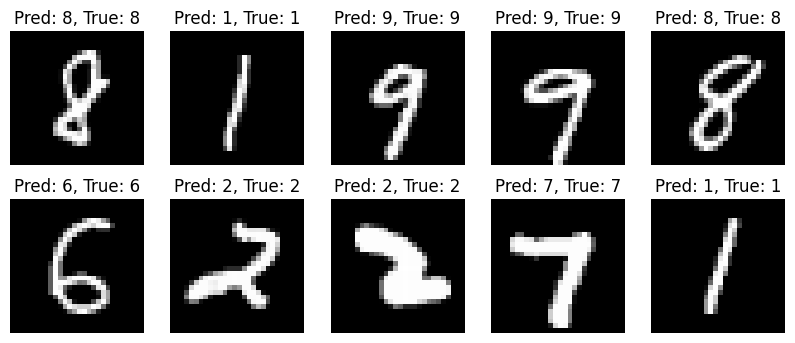

In [8]:
from sklearn.metrics import classification_report

print("Classification Report (RBF):")
print(classification_report(y_val[:2000], y_pred_rbf))

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_val.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_rbf[i]}, True: {y_val.iloc[i]}")
    plt.axis('off')
plt.show()


## ⚡ Train RBF SVM on a Subset
To reduce computation time, train the RBF SVM on a smaller subset of 5,000 samples.
- Uses C=10, gamma=0.05 for balanced performance.
- Evaluates accuracy on the first 2,000 validation samples.

In [17]:
# RBF on subset
subset_size = 5000
X_sub = X_train.iloc[:subset_size]
y_sub = y_train.iloc[:subset_size]
print('Training SVC(rbf) on subset', X_sub.shape)
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.05)
svm_rbf.fit(X_sub, y_sub)
y_pred_rbf = svm_rbf.predict(X_val.iloc[:2000])
print('RBF subset accuracy (2000 val samples):', accuracy_score(y_val.iloc[:2000], y_pred_rbf))


Training SVC(rbf) on subset (5000, 784)
RBF subset accuracy (2000 val samples): 0.9545


## 🔍 Hyperparameter Tuning with GridSearchCV
Use GridSearchCV to find the best RBF SVM parameters (C and gamma).
- Runs on a smaller subset (3,000 samples) for speed.
- Uses 3-fold cross-validation to evaluate combinations.
- Prints the best parameters and corresponding score.

In [18]:
# GridSearchCV (small subset)
param_grid = {'C': [1,5,10], 'gamma':[0.01,0.05,0.1], 'kernel':['rbf']}
small = 3000
grid = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train.iloc[:small], y_train.iloc[:small])
print('Best params:', grid.best_params_)
print('Best CV score:', grid.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best params: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV score: 0.9356666666666668


## 💾 Step 13: Save Trained Models
Save the trained SVM models using Joblib best for sk-learn model.
- Stores the linear, RBF (subset), and best GridSearch models (if available).
- Enables reloading models without retraining.

In [28]:
# Save models
joblib.dump(lin_clf, 'svm_linear_full.joblib')
joblib.dump(svm_rbf, 'svm_rbf_subset.joblib')
if hasattr(grid, 'best_estimator_'):
    joblib.dump(grid.best_estimator_, 'svm_rbf_grid_best.joblib')
print('Models saved.')


Models saved.
